In [72]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple

In [74]:
# for preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

# to split data 
from sklearn.model_selection import train_test_split, cross_val_score

# TO Evaluation 
from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score
from sklearn.metrics import confusion_matrix , classification_report 

# classification models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Breast Cancer dataset: *exploratory data analysis*

In [75]:
df_bc = pd.read_csv("../datasets/breast-cancer-seer.csv")

In [76]:
df_bc

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [77]:
df_bc.columns = df_bc.columns.str.lower().str.replace(' ', '_')

In [78]:
df_bc

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [79]:
df_bc["status"].unique()

array(['Alive', 'Dead'], dtype=object)

In [101]:
df_bc.groupby("status").size()

status
Alive    3408
Dead      616
dtype: int64

In [80]:
def fit_gaussian_to_feature(x_feat: pd.Series) -> Tuple[np.array]:
    # Compute mean and standard deviation
    mean = x_feat.mean()
    std_dev = x_feat.std()

    # Generate 1000 points between min and max of feature
    x = np.linspace(x_feat.min(), x_feat.max(), 1000) 

    # Compute Gaussian
    A = 1 / (std_dev * np.sqrt(2 * np.pi))
    gaussian_curve = A * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    
    return x, gaussian_curve

In [81]:
# Plotting data of some numerical features
numerical_features = ["age", "tumor_size", "regional_node_examined", "survival_months"]

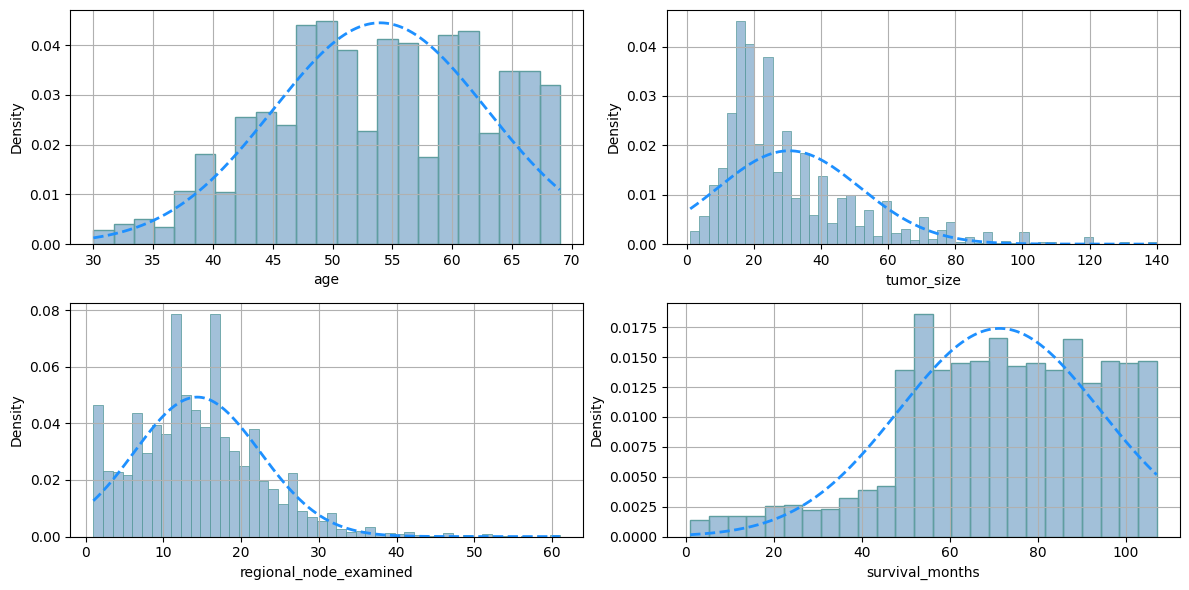

In [82]:
n_rows = 2
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,6))

# Flatten the 2D array of axes objects to simplify indexing
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(ax):  # Make sure to only use the available axes
        # Plot the histogram
        sns.histplot(df_bc[feature], stat="density", ax=ax[i], color="steelblue", edgecolor="cadetblue", alpha=0.5)
        
        # Generate and plot the Gaussian curve
        x, gaussian_curve = fit_gaussian_to_feature(df_bc[feature])
        ax[i].plot(x, gaussian_curve, color="dodgerblue", linestyle="--", linewidth=2)  

        ax[i].grid(True, zorder=0)
        
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<Axes: >

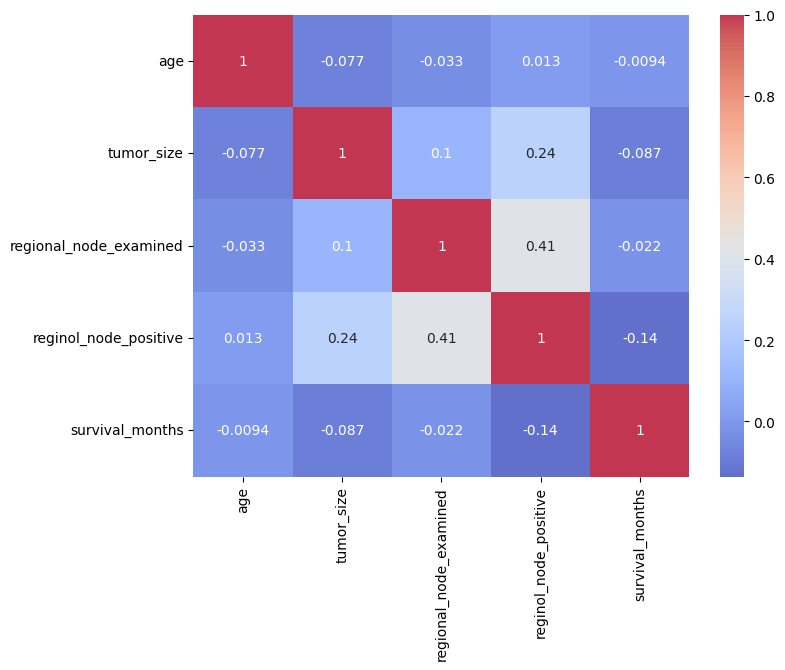

In [83]:
# Let's check out the correlation between numerical variables
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(df_bc.corr(numeric_only=True) , annot =True , cmap="coolwarm", alpha=0.8)

In [84]:
categorical_features = ["race", "marital_status", "t_stage_", "n_stage", "progesterone_status", "differentiate"]

In [85]:
def get_counts(df: pd.DataFrame, col_name: str):
    return df.groupby(col_name).size().reset_index(name="count")

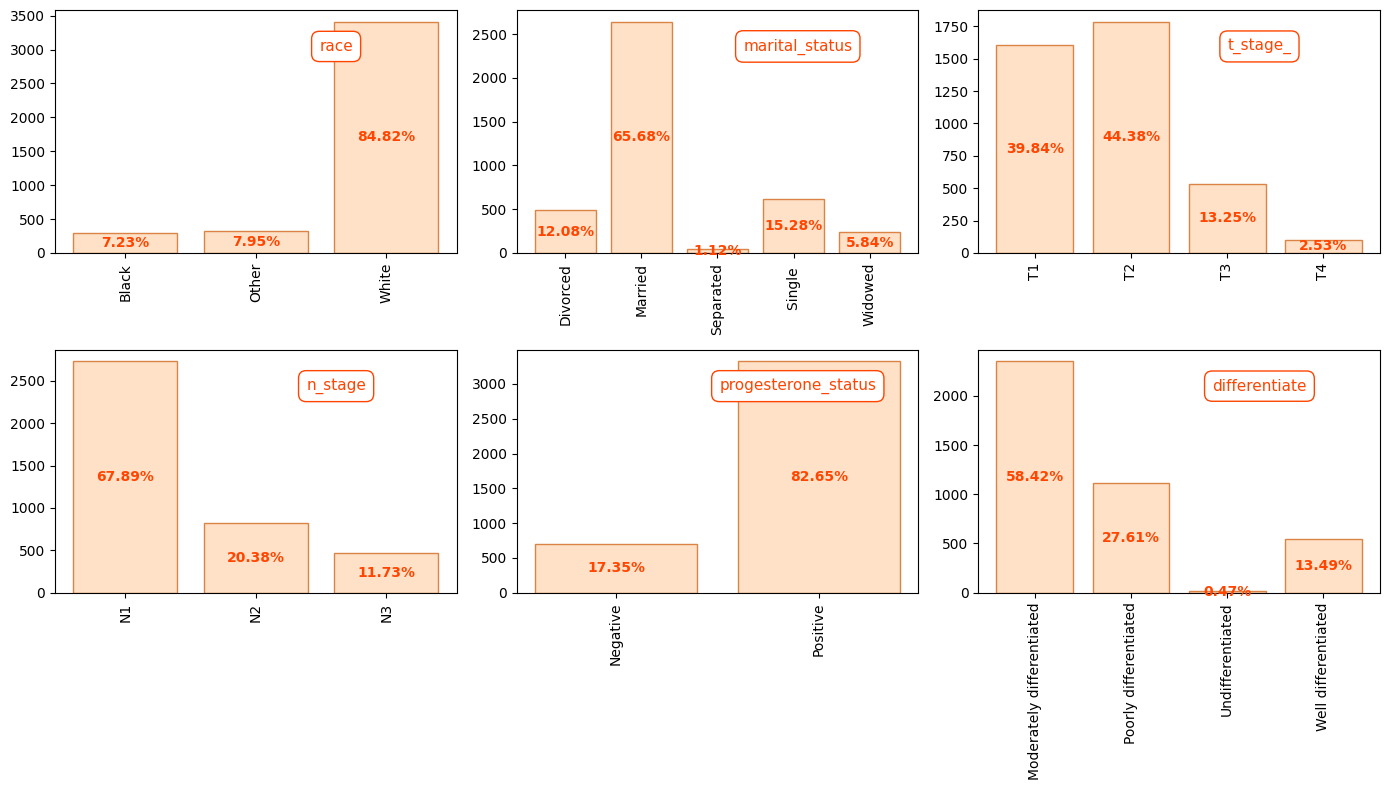

In [86]:
n_cols = 3
n_rows = len(categorical_features) // 3 

fig, ax  = plt.subplots(n_rows, n_cols, figsize=(14,8))

# Flatten the 2D array of axes objects to simplify indexing
ax = ax.flatten()

for i, feature in enumerate(categorical_features):
    
    df_counts = get_counts(df_bc, feature)
    percs = df_counts["count"]/df_counts["count"].sum()
    
    bars = ax[i].bar(df_counts[feature], df_counts["count"], color="peachpuff", edgecolor="chocolate", alpha=0.8)

    # Add text with a bounding box, using relative coordinates
    ax[i].text(
        0.7, 0.85, 
        feature,
        fontsize=11,
        color="orangered",
        ha='center', va='center',
        transform=ax[i].transAxes, 
        bbox=dict(
            facecolor='white', edgecolor='orangered', 
            boxstyle='round,pad=0.5')
        )
    
    # filling bars    
    for j, bar in enumerate(bars):
        x = bar.get_x()
        width = bar.get_width()
        height = bar.get_height()
        ax[i].text(
            x+width/2, 
            height/2, 
            f"{str(round(percs[j]*100, 2))}%", 
            ha="center", va="center", color="orangered", fontsize=10, fontweight="bold"
        )

    ax[i].set_xticklabels(df_counts[feature], rotation=90)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [167]:
# Step 1: Select the categorical features and apply one-hot encoding
df_encoded = pd.get_dummies(df_bc[categorical_features], drop_first=True)

# Step 2: Select the numerical features
df_numerical = df_bc[numerical_features]

# Step 3: Combine both numerical and encoded categorical features into a new DataFrame
df_final = pd.concat([df_numerical, df_encoded], axis=1)

In [168]:
# Now df_final can be used to fit a decision tree
df_final.head()

,age,tumor_size,regional_node_examined,survival_months,race_Other,race_White,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,t_stage__T2,t_stage__T3,t_stage__T4,n_stage_N2,n_stage_N3,progesterone_status_Positive,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated
0,68,4,24,60,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False
1,50,35,14,62,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False
2,58,63,14,75,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False
3,58,18,2,84,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False
4,47,41,3,50,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False


In [169]:
# Split your data into features (X) and target variable (y)
X = df_final  
y = df_bc["status"]  

In [170]:
X_train , X_test , y_train , y_test = train_test_split(
    X, y , 
    test_size=0.2, shuffle=True,
    random_state= 43 , stratify=y
)

## Tuning the `max_depth`

In [171]:
max_depths = list(range(1, 13, 1))

In [172]:
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [173]:
mean_cross_val_score = []
train_accuracies = []

In [174]:
for max_depth in max_depths:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)

    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean_cross_val_score.append(scores.mean())

    # predicting train
    tree.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, tree.predict(X_train))
    train_accuracies.append(train_accuracy)

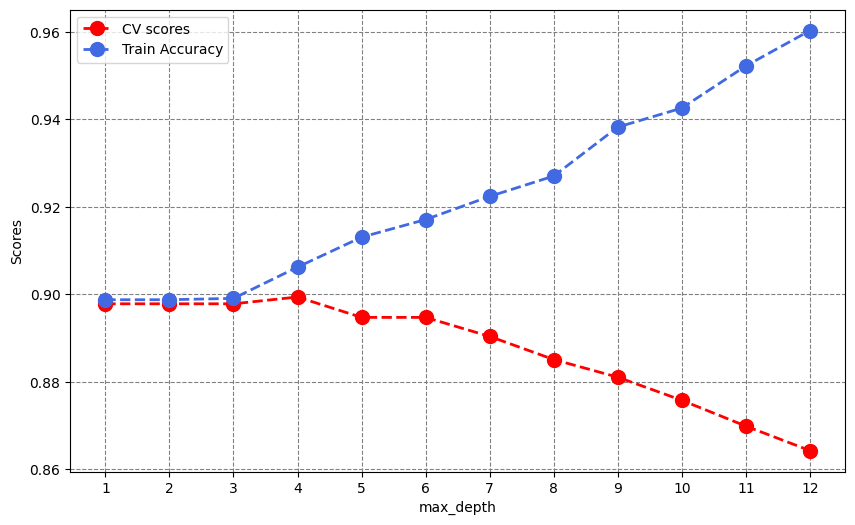

In [175]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(max_depths, mean_cross_val_score, marker="o", label="CV scores", color="red", linestyle="--", linewidth=2, markersize=10)
ax.plot(max_depths, train_accuracies, marker="o", color="royalblue", label="Train Accuracy", linestyle="--", linewidth=2, markersize=10)

ax.set_xlabel("max_depth")
ax.set_ylabel("Scores")

ax.set_xticks(range(1, 13, 1))

ax.grid(True, linestyle="--", color="grey")
ax.legend()
plt.show()

In [176]:
optimal_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
optimal_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

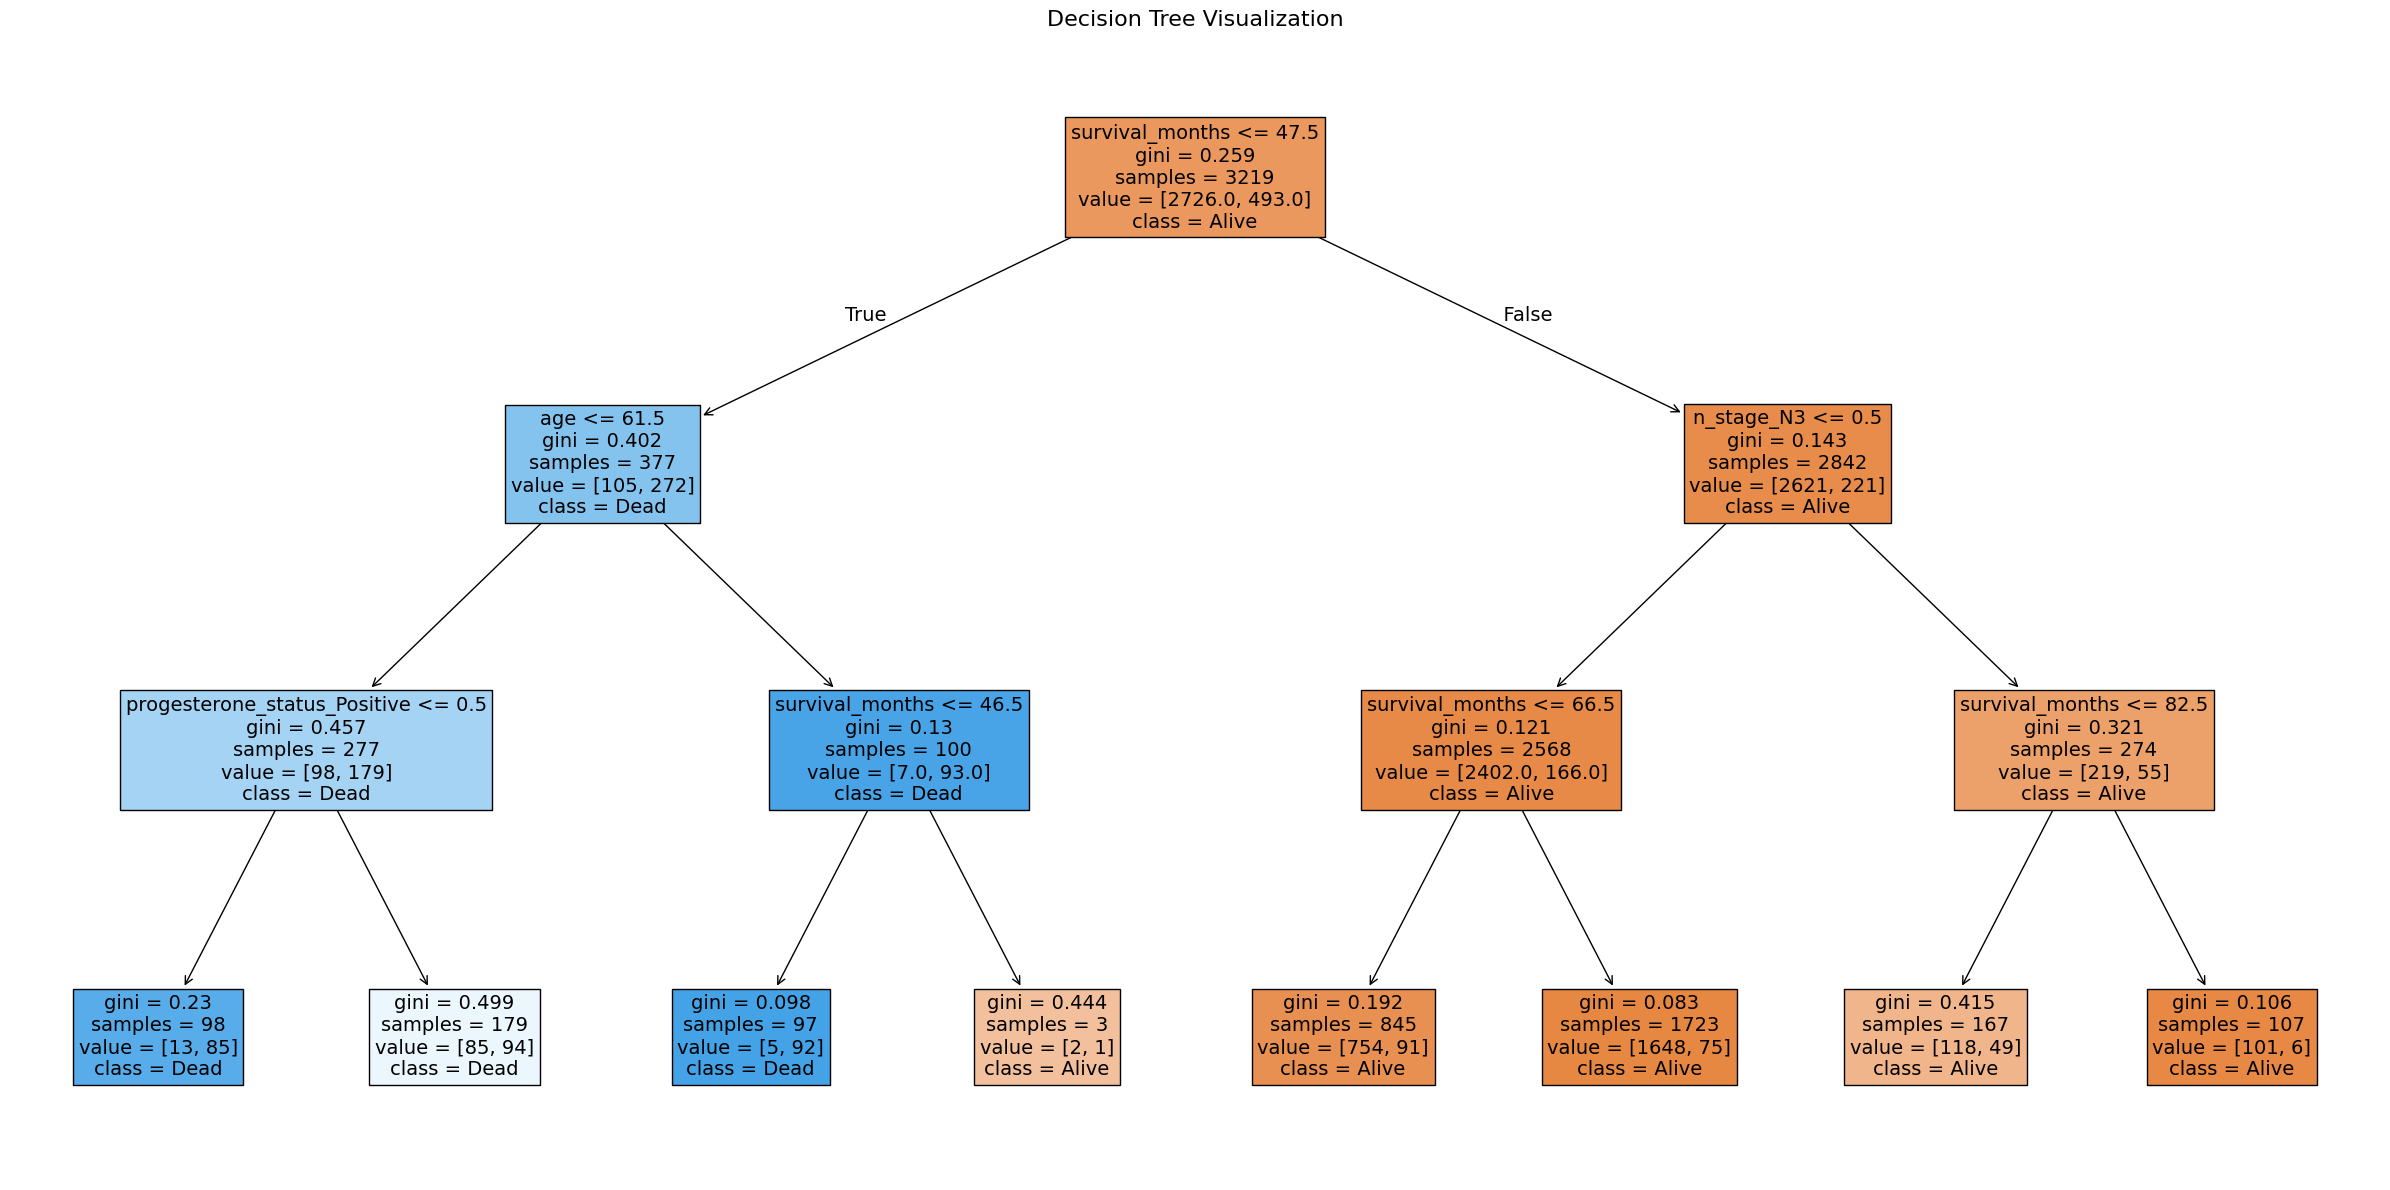

In [177]:
# Convert class names to strings
class_names = [str(cls) for cls in optimal_tree.classes_]

# Plotting the decision tree
fig, ax = plt.subplots(figsize=(24, 12))  

# Plot the decision tree
plot_tree(optimal_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in optimal_tree.classes_],
          fontsize=14,  # Adjust font size
          proportion=False,
         ax=ax
         )  # Set to False to keep node sizes standard

ax.set_title('Decision Tree Visualization', fontsize=16)
plt.tight_layout()  
plt.show()

In [178]:
len(y_test[y_test=="Dead"])

123

In [179]:
# Step 3: Make predictions
y_pred = optimal_tree.predict(X_test)

# Step 4: Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Calculate precision
precision = precision_score(y_test, y_pred, pos_label="Dead")
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label="Dead")
print(f'Recall: {recall:.2f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.90
Precision: 0.72
Recall: 0.55


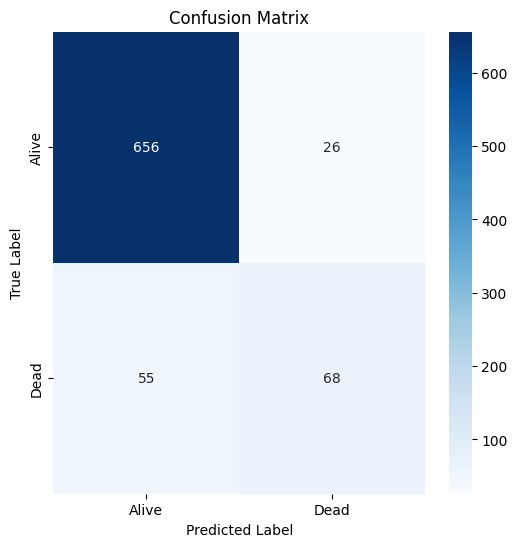

In [180]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'], ax=ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()